In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import matplotlib.image as mpimg

In [3]:
df = pd.read_csv('20241002.csv')
df.head(10)

,Unnamed: 0,step,track_no,own_track,unsure_tracks,position,radius,fish_name
0,0,0,0,f6b60fda-5c3d-4ffa-8380-9fca32621a98,[],"[283.0, 425.0]",58.982239,-1
1,1,0,1,ff5d8cba-210c-47f8-ad6a-c7fe5f73abb5,[],"[294.0, 498.0]",60.365417,-1
2,2,0,2,a5833c1e-5179-4c69-8940-5130ab84ab94,[],"[535.0, 427.0]",64.622711,-1
3,3,0,3,9e5964fe-1988-485f-b4c5-d9267a978d84,[],"[358.0, 464.0]",33.817200,-1
4,4,0,4,3178461f-67ad-4720-9721-9795ca07a179,[],"[354.0, 394.0]",38.908905,-1
5,5,0,5,908af92c-c7fd-4aff-a5cf-45e03684a9ff,[],"[343.0, 440.0]",45.683350,-1
6,6,0,6,7f0b8be5-77c2-4397-9b1f-7d093f824d7d,[],"[501.0, 398.0]",68.372192,2
7,7,0,7,e4ad996f-8cf0-414e-a209-25f559c29580,[],"[203.0, 552.0]",43.096130,-1
8,8,0,8,7b56ca9e-1d47-4135-a368-c68b78a73deb,[],"[372.0, 370.0]",39.916687,6
9,9,0,9,7f18ef5f-3a20-42da-b008-cccdb7fb1176,[],"[307.0, 471.0]",28.073975,-1


In [4]:
df['position'] = df['position'].apply(lambda x: eval(x) if isinstance(x, str) else x)

df['x'] = [pos[0] for pos in df['position']]
df['y'] = [pos[1] for pos in df['position']]
df.head(5)

,Unnamed: 0,step,track_no,own_track,unsure_tracks,position,radius,fish_name,x,y
0,0,0,0,f6b60fda-5c3d-4ffa-8380-9fca32621a98,[],"[283.0, 425.0]",58.982239,-1,283.0,425.0
1,1,0,1,ff5d8cba-210c-47f8-ad6a-c7fe5f73abb5,[],"[294.0, 498.0]",60.365417,-1,294.0,498.0
2,2,0,2,a5833c1e-5179-4c69-8940-5130ab84ab94,[],"[535.0, 427.0]",64.622711,-1,535.0,427.0
3,3,0,3,9e5964fe-1988-485f-b4c5-d9267a978d84,[],"[358.0, 464.0]",33.817200,-1,358.0,464.0
4,4,0,4,3178461f-67ad-4720-9721-9795ca07a179,[],"[354.0, 394.0]",38.908905,-1,354.0,394.0


In [5]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import cv2


# # โหลดภาพพื้นหลัง
# image = cv2.imread('image_092839_266773.jpg')

# # แปลงภาพเป็น RGB สำหรับ matplotlib
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # วาดจุดจาก dataset ลงในภาพ สำหรับ 1000 ค่าแรก
# for index, row in df.head(1000).iterrows():  # ใช้ head(1000) เพื่อจำกัดแค่ 1000 ค่าแ
#     x = row['x']
#     y = row['y']

#     cv2.circle(image_rgb, (int(x), int(y)), 5, (255, 0, 0), -1)  # วาดจุดเป็นวงกลมสีแดง

# # แสดงภาพที่มีจุดที่ถูก plot
# plt.imshow(image_rgb)
# plt.axis('off')  # ซ่อนแกน x และ y
# plt.title('Plot Points from Dataset (First 1000 Points)')
# plt.show()


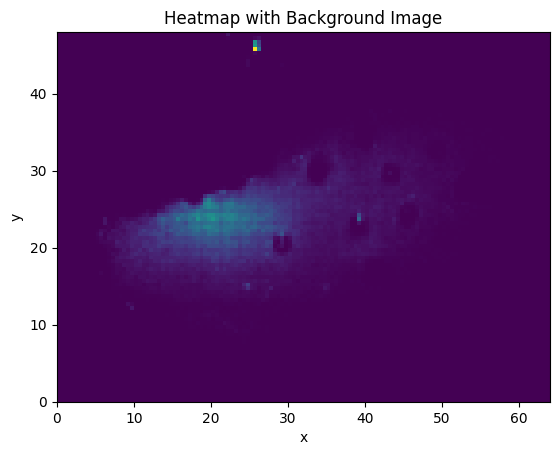

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg


df['position'] = df['position'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['x'] = [pos[0] for pos in df['position']]
df['y'] = [pos[1] for pos in df['position']]

df_step = df

heatmap_data, xedges, yedges = np.histogram2d(df_step['x'], df_step['y'], bins=(1280 // 10, 960 // 10))
heatmap_data = np.fliplr(heatmap_data)

background_img = mpimg.imread('image_092839_266773.jpg')  

fig, ax = plt.subplots()

heatmap = ax.imshow(heatmap_data.T, origin='lower', cmap='viridis', interpolation='nearest', alpha=0.51, extent=[0, 1280 // 20, 0, 960 // 20])

plt.title('Heatmap with Background Image')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
df['x'].max()

1273.0

In [8]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import cv2


# # โหลดภาพพื้นหลัง (แผนที่จริง)
# background_img = mpimg.imread('image_092839_266773.jpg')

# # ตั้งค่าขนาดของ bins สำหรับ histogram
# size_x, size_y = background_img.shape[1], background_img.shape[0]  # ขนาดภาพ
# size_bin = 20  # ขนาด bin ของ heatmap

# # สร้าง heatmap สำหรับแต่ละช่วงเวลา
# for step in df['step'].unique():
#     # กรองข้อมูลตาม step
#     df_step = df[df['step'] == step]

#     # สร้าง heatmap data
#     heatmap_data, xedges, yedges = np.histogram2d(df_step['x'], df_step['y'], bins=(size_x // size_bin, size_y // size_bin))
#     heatmap_data = np.fliplr(heatmap_data)
#     # สร้าง plot
#     fig, ax = plt.subplots()
#     ax.imshow(background_img, extent=[0, size_x, 0, size_y], aspect='auto')

#     # วาด heatmap บนภาพพื้นหลัง
#     heatmap = ax.imshow(heatmap_data.T, origin='lower', cmap='viridis', interpolation='nearest', alpha=0.5, extent=[0, size_x, 0, size_y])

#     # เพิ่ม colorbar และรายละเอียด
#     plt.colorbar(heatmap)
#     plt.title(f'Heatmap at Step {step}')
#     plt.xlabel('X Position')
#     plt.ylabel('Y Position')
    
#     # แสดง plot
#     plt.show()
